In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.1.0


(0, 8)

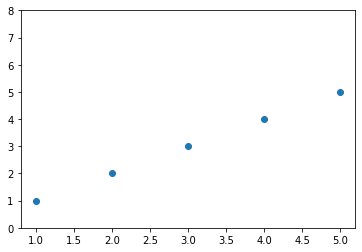

In [4]:
X = [1,2,3,4,5]
Y = [1,2,3,4,5]

import matplotlib.pyplot as plt
plt.plot(X, Y, 'o')
plt.ylim(0,8)

In [5]:
v = [1.,2.,3.,4.]
tf.reduce_mean(v)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [6]:
tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [7]:
X = [1,2,3,4,5]
Y = [1,2,3,4,5]
w = tf.Variable(2.0)
b = tf.Variable(0.5)

hypo = w * X + b
w.numpy(), b.numpy()

(2.0, 0.5)

In [8]:
hypo.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

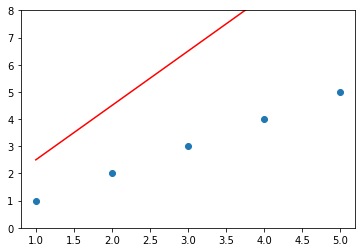

In [13]:
plt.plot(X,hypo.numpy(), 'r-')
plt.plot(X,Y,'o')
plt.ylim(0,8)
plt.show()

In [ ]:
cost = tf.reduce_mean(tf.square(hypo - Y))

In [14]:
with tf.GradientTape()as tape:
    hypo = w * X + b
    cost = tf.reduce_mean(tf.square(hypo - Y))
w_grad, b_grad = tape.gradient(cost, [w,b])
w_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

In [15]:
learning_rate = 0.01
w.assign_sub(learning_rate * w_grad)
b.assign_sub(learning_rate * b_grad)
w.numpy(), b.numpy()

(1.75, 0.43)

    0|    1.5592|    0.3764|  8.307401
   10|    0.9863|    0.2103|  0.044735
   20|    0.9495|    0.1930|  0.006943
   30|    0.9487|    0.1859|  0.006331
   40|    0.9502|    0.1797|  0.005915
   50|    0.9519|    0.1737|  0.005528
   60|    0.9535|    0.1679|  0.005166
   70|    0.9550|    0.1623|  0.004828
   80|    0.9565|    0.1569|  0.004511
   90|    0.9580|    0.1517|  0.004216


(0, 8)

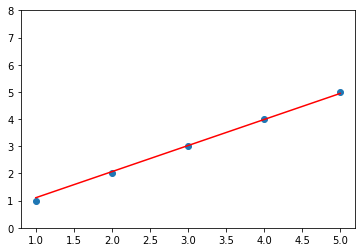

In [17]:
for i in range(100):
    with tf.GradientTape() as tape:
        hypo = w * X + b
        cost = tf.reduce_mean(tf.square(hypo - Y))
    w_grad, b_grad = tape.gradient(cost, [w,b])
    w.assign_sub(learning_rate * w_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, w.numpy(),b.numpy(), cost))
plt.plot(X, Y, 'o')
plt.plot(X, hypo.numpy(), 'r-')
plt.ylim(0,8)